In [1]:
from bending_validation import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
iplot = interactive(runTestVisualization,
                    L=fixed(1),
                    a=widgets.FloatSlider(min=0.01, max=1, value=0.5, step=0.01),
                    numVertices=widgets.IntSlider(min=3,max=100,step=2,value=41),
                    gradTol=fixed(1e-12))
iplot.children[-1].layout.height = '450px'
display(iplot)

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, min=0.01, step=0.01), IntSlider(value=4…

Force  error = 4.05 h^1.99
Height error = 0.00 h^-0.03


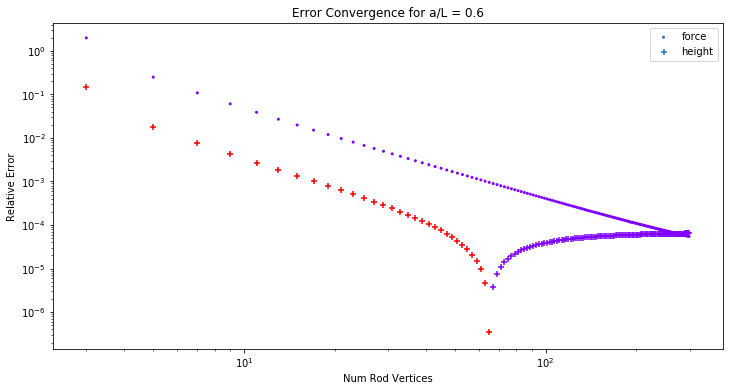

3.9098594188690186


In [3]:
t = time.time()
convergenceTest(0.6, 300, 1e-11)
print(time.time() - t)

In [4]:
from PlanarElastica import AnalyticRod
arod = AnalyticRod(1, 0.5)
arod.height() # correct to 15 digits vs Mathematica...

0.3733064274452093

In [5]:
with suppress_stdout():
    errors = [(i, simulationErrors(1, 0.7, i)) for i in range(3, 300, 2)]

In [6]:
simulationErrors(1, 0.7, 207, 1e-32)

System matrix is not positive definite; increasing tau to 1e-08
System matrix is not positive definite; increasing tau to 4e-08
System matrix is not positive definite; increasing tau to 1.6e-07
System matrix is not positive definite; increasing tau to 6.4e-07
System matrix is not positive definite; increasing tau to 2.56e-06
System matrix is not positive definite; increasing tau to 1.024e-05
System matrix is not positive definite; increasing tau to 4.096e-05
System matrix is not positive definite; increasing tau to 0.00016384
System matrix is not positive definite; increasing tau to 0.00065536
System matrix is not positive definite; increasing tau to 0.00262144
System matrix is not positive definite; increasing tau to 0.0104858
System matrix is not positive definite; increasing tau to 0.041943
System matrix is not positive definite; increasing tau to 0.167772
System matrix is not positive definite; increasing tau to 0.671089
System matrix is not positive definite; increasing tau to 2.6

((8.7329000659909e-05, 7.716005191655024e-05), 33)

In [6]:
r, fixedVars = bendingTestRod(1, 0.7, 207)
elastic_rods.compute_equilibrium(r, fixedVars=fixedVars)

System matrix is not positive definite; increasing tau to 1e-08
System matrix is not positive definite; increasing tau to 4e-08
System matrix is not positive definite; increasing tau to 1.6e-07
System matrix is not positive definite; increasing tau to 6.4e-07
System matrix is not positive definite; increasing tau to 2.56e-06
System matrix is not positive definite; increasing tau to 1.024e-05
System matrix is not positive definite; increasing tau to 4.096e-05
System matrix is not positive definite; increasing tau to 0.00016384
System matrix is not positive definite; increasing tau to 0.00065536
System matrix is not positive definite; increasing tau to 0.00262144
System matrix is not positive definite; increasing tau to 0.0104858
System matrix is not positive definite; increasing tau to 0.041943
System matrix is not positive definite; increasing tau to 0.167772
System matrix is not positive definite; increasing tau to 0.671089
System matrix is not positive definite; increasing tau to 2.6

In [8]:
runTestVisualization()

TypeError: runTestVisualization() missing 3 required positional arguments: 'L', 'a', and 'numVertices'

In [9]:
L = 1
a = 0.1
n = 51
perturb = False
r, fixedVars = bendingTestRod(L, a, n)
pts, thetas = initialConfiguration(L, a, n, perturb)
thetas = np.ones(n - 1) * (np.pi / 2 + 1e-2)
r.setDeformedConfiguration(pts, thetas)

view = linkage_vis.LinkageViewer(r, width=1024, height=600)
view.setCameraParams(((0.8471149305506829, 2.303483674764291, 0.4579086561101697),
 (-0.05274977528957473, 0.1226800644593855, 0.9910434213449677),
 (-0.41643357695558714, 0.21249216220933723, -0.36668979830898635)))
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.7066666666666668, children=(DirectionalLight(color='white', intensi…

In [10]:
elastic_rods.compute_equilibrium(r, fixedVars=fixedVars)
view.update()

System matrix is not positive definite; increasing tau to 1e-08
System matrix is not positive definite; increasing tau to 4e-08
System matrix is not positive definite; increasing tau to 1.6e-07
System matrix is not positive definite; increasing tau to 6.4e-07
System matrix is not positive definite; increasing tau to 2.56e-06
System matrix is not positive definite; increasing tau to 1.024e-05
System matrix is not positive definite; increasing tau to 4.096e-05
System matrix is not positive definite; increasing tau to 0.00016384
System matrix is not positive definite; increasing tau to 0.00065536
System matrix is not positive definite; increasing tau to 0.00262144
System matrix is not positive definite; increasing tau to 0.0104858
System matrix is not positive definite; increasing tau to 0.041943
System matrix is not positive definite; increasing tau to 0.167772
System matrix is not positive definite; increasing tau to 0.671089
System matrix is not positive definite; increasing tau to 2.6

In [11]:
from compute_vibrational_modes import compute_vibrational_modes, MassMatrixType
import mode_viewer

lambdas, modes = compute_vibrational_modes(r, fixedVars)
mview = mode_viewer.ModeViewer(r, modes, lambdas)
mview.show()

In [ ]:
mview.exportHTML('mode_0.html')

In [ ]:
mview.exportHTML('mode_1.html')

In [ ]:
mview.exportHTML('mode_2.html')

In [ ]:
import pickle
pickle.dump(r, open('low_gradient.pkl', 'wb'))

In [ ]:
from mode_viewer import ModeViewer
ModeViewer

In [ ]:
def getDoFs(rod):
    return np.concatenate([np.concatenate(rod.deformedPoints()), rod.thetas()])
def setDoFs(rod, dofs):
    pts = list(dofs[3 * i:3 * i + 3] for i in range(rod.numVertices()))
    thetas = dofs[3 * rod.numVertices():]
    rod.setDeformedConfiguration(pts, thetas)
def energyAt(rod, dof, etype = elastic_rods.EnergyType.Full):
    prevDoF = getDoFs(rod)
    setDoFs(rod, dof)
    energy = rod.energy(etype)
    setDoFs(rod, prevDoF)
    return energy

In [ ]:
import matplotlib.pyplot as plt
def plotEnergy(rod, direction, steps):
    restDoF = getDoFs(rod)
    plt.plot(steps, [energyAt(rod, restDoF + s * direction) for s in steps])

In [ ]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import norm
Htrip = r.hessian()
Htrip.reflectUpperTriangle()
H = csc_matrix(Htrip.compressedColumn())
Hspsd = sparse_matrices.SPSDSystem(Htrip)
Hspsd.fixVariables(fixedVars, [0 for i in fixedVars])

g = r.gradient()
gzero = g
gzero[fixedVars] = 0
direction = Hspsd.solve(-gzero)
dunit = direction / norm(direction)
gunit = gzero / norm(gzero)

print(np.dot(r.gradient(), direction))
print(np.dot(gunit, dunit))
# direction = -r.gradient()
# for var in fixedVars:
#     direction[var] = 0
plotEnergy(r, -gzero, np.linspace(-20, 20, 100))

In [ ]:
def fd_gradient_test(r, stepSize, direction, etype=elastic_rods.EnergyType.Full):
    grad = r.gradient(False, etype)
    return [(energyAt(r, getDoFs(r) + stepSize * direction, etype) - energyAt(r, getDoFs(r) - stepSize * direction, etype)) / (2 * stepSize), np.dot(direction, grad)]

In [ ]:
fd_gradient_test(r, 1e-8, direction, etype=elastic_rods.EnergyType.Twist)

In [ ]:
fd_gradient_test(r, 1e-8, direction, etype=elastic_rods.EnergyType.Twist)

In [ ]:
Htrip.dumpBinary('Htrip.mat')

In [ ]:
g = r.gradient()

np.dot(g / np.linalg.norm(g), direction / np.linalg.norm(direction))

In [ ]:
evals,evecs = scipy.sparse.linalg.eigsh(H, which='LM', sigma=0)

In [ ]:
Htrip2 = r.hessian()
Htrip2.reflectUpperTriangle()
Htrip2.rowColRemoval(fixedVars)
Htrip2.dumpBinary('Htrip2.mat')
H2 = csc_matrix(Htrip2.compressedColumn())
g2 = np.delete(g, fixedVars)
dir2 = spsolve(H2, -g2)
evalsSM, evecsSM = scipy.sparse.linalg.eigsh(H2, which='LM', sigma=0)
evalsLM, evecsLM = scipy.sparse.linalg.eigsh(H2, which='LM')
print(evalsSM)
print(evalsLM)

In [ ]:
pts = r.deformedPoints()
thetas = r.thetas()

In [ ]:
fd_gradient_test(r, 1e-9, np.random.random_sample(direction.shape), etype=elastic_rods.EnergyType.Twist)

In [ ]:
dc = r.deformedConfiguration()

In [ ]:
import pickle

In [ ]:
dcDict = {'energies': {t: r.energy(t) for t in elastic_rods.EnergyType.__members__.values()},
          'gradients': {t: r.gradient(energyType=t) for t in elastic_rods.EnergyType.__members__.values()},
          'pts': r.deformedPoints(),
          'thetas': r.thetas(),
          'referenceDirectors': [{'d1': r.d1, 'd2': r.d2} for r in dc.referenceDirectors],
          'materialFrame':[{'d1': f.d1, 'd2': f.d2} for f in dc.materialFrame],
          'referenceTwist': dc.referenceTwist}

In [ ]:
pickle.dump(dcDict, open('bad_configuration.pkl', 'wb'))

In [ ]:
badConfig = pickle.load(open('bad_configuration.pkl', 'rb'));

In [ ]:
r2.energy()

In [ ]:
r.energy()

In [ ]:
{t: r.energy(t) for t in elastic_rods.EnergyType.__members__.values()}

In [ ]:
fixedVars